<a href="https://colab.research.google.com/github/Raptor-sj22/ML-Training/blob/main/Linear_Regression/Linear_regression_exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear_regression_exercise_1
##Project Summary

This code demonstrates a **basic linear regression workflow** using **synthetic data** generated from a known linear function with added noise. It uses `numpy` to create the data, `matplotlib` for plotting, and `scikit-learn` to train and evaluate the model.

The process includes:
- **Data generation**: Input features are linearly spaced values from 0 to 10, and targets are created from a linear equation `y = 2.5x + noise`,
- **Model training** using `LinearRegression` from `sklearn.linear_model`,
- **Model evaluation** using the coefficient of determination (**R² score**) and **extraction of learned model parameters** (slope and intercept),
- **Prediction** on the training data and **residual computation**,
- **Visualization** of the original data points, the **regression line**, and the **residuals**.

This notebook serves as a **foundational illustration of linear regression** mechanics, emphasizing how the model fits noisy data and assessing the quality of that fit using standard metrics and plots.


In [ ]:
#@title Install required libraries

!pip install keras~=3.8.0 \
  matplotlib~=3.10.0 \
  numpy~=2.0.0 \
  pandas~=2.2.0 \
  tensorflow~=2.18.0

print('\n\nAll requirements successfully installed.')



All requirements successfully installed.


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.7427  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.0478   
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.4427  
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5901 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4384 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4726 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2404 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3135 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.8711 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5226 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.2167
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9599 
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3309  
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5918 
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

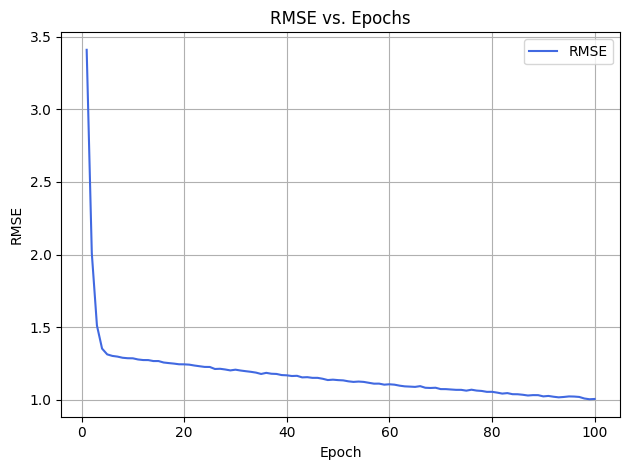

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers
import matplotlib.pyplot as plt

# Sample data
np.random.seed(0)
X = np.linspace(0, 10, 20).reshape(-1, 1)
y = 2 * X + 1 + np.random.normal(0, 1, (20, 1))

# Hyperparameters
epochs = 100
batch_size = 2
learning_rate = 0.001

# Custom callback to log RMSE and epoch numbers
class RMSELogger(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.epoch_nums = []
        self.rmses = []

    def on_epoch_end(self, epoch, logs=None):
        rmse = np.sqrt(logs.get('loss'))
        self.epoch_nums.append(epoch + 1)  # +1 to make it human-readable (start from 1)
        self.rmses.append(rmse)

# Build model
model = keras.Sequential([
    keras.Input(shape=(1,)),   # Replaces input_shape warning
    layers.Dense(1)
])

# Compile the model
optimizer = optimizers.SGD(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse')

# Train model with RMSE logger
rmse_logger = RMSELogger()
model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[rmse_logger])

# Plot RMSE vs Epochs with explicit x-axis (epoch numbers)
plt.plot(rmse_logger.epoch_nums, rmse_logger.rmses, label='RMSE', color='royalblue')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE vs. Epochs')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
